In [1]:
import nltk

In [2]:
import os

In [4]:
def init_lists(folder):
    a_list = []
    file_list = os.listdir(folder)
    for a_file in file_list:
        f = open(folder + a_file, 'r',errors='ignore')
        a_list.append(f.read())
    f.close()
    return a_list

In [5]:
spam = init_lists('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/spam/')
ham = init_lists('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/ham/')

In [6]:
all_emails = [(email, 'spam') for email in spam]
print (len(all_emails))
all_emails += [(email, 'ham') for email in ham]
print (len(all_emails))       

1500
5172


In [7]:
print(all_emails[1])

('Subject: your prescription is ready . . oxwq s f e\nlow cost prescription medications\nsoma , ultram , adipex , vicodin many more\nprescribed online and shipped\novernight to your door ! !\none of our us licensed physicians will write an\nfda approved prescription for you and ship your\norder overnight via a us licensed pharmacy direct\nto your doorstep . . . . fast and secure ! !\nclick here !\nno thanks , please take me off your list\nogrg z\nlqlokeolnq\nlnu', 'spam')


In [8]:
import random

In [9]:
random.shuffle(all_emails)

In [26]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
from nltk import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [27]:
def preprocess(sentence):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(sentence)]

In [28]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('churches'))

church


In [29]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
stoplist = stopwords.words('english')

In [31]:
from collections import Counter

In [32]:
def get_features(text, setting):
    if setting=='bow':
        return {word: count for word, count in Counter(preprocess(text)).items() if not word in stoplist}
    else:
        return {word: True for word in preprocess(text) if not word in stoplist}

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
all_features = [(get_features(email, 'bow'), label) for (email, label) in all_emails]

In [35]:
print(all_features[1])

({'subject': 1, ':': 1, 'nom': 2, '2': 8, '/': 13, '28': 3, '29': 4, '-': 1, 'hpl': 2, 'delivery': 1, 'eastrans': 3, 'monday': 1, 'tuesday': 1, ',': 10, 'need': 1, 'reduce': 2, 'nomination': 1, '60': 1, '000': 6, 'mmbtu': 7, '40': 1, 'due': 1, 'maintenance': 1, 'e': 2, '.': 7, 'texas': 1, 'plant': 1, 'therefore': 1, 'noms': 1, 'pg': 1, '&': 1, '33': 1, '7': 1, 'continue': 2, 'come': 1, 'fuel': 1, 'cotton': 1, 'valley': 1, 'increase': 2, '3': 3, '1': 2, '50': 1, '65': 1, 'sale': 2, '500': 1, 'effective': 1, 'please': 1, '750': 1}, 'ham')


In [36]:
from nltk import NaiveBayesClassifier, classify

In [37]:

def train(features, samples_proportion):
    train_size = int(len(features) * samples_proportion)
    train_set, test_set = features[:train_size], features[train_size:]
    print ('Training set size = ' + str(len(train_set)) + ' emails')
    print ('Test set size = ' + str(len(test_set)) + ' emails')
     # train the classifier
    classifier = NaiveBayesClassifier.train(train_set)
    return train_set, test_set, classifier

In [38]:
def evaluate(train_set, test_set, classifier):
    # test accuracy of classifier on training and test set
    print ('Training set accuracy = ' + str(classify.accuracy(classifier, train_set)))
    print ('Test set accuracy = ' + str(classify.accuracy(classifier, test_set)))
    # check most informative words for the classifier
    classifier.show_most_informative_features(20)
    # check prediction for words in mail
    print ('Test for a single example mail = ' + classifier.classify(get_features("ram,shyam", 'bow')))

In [39]:
# train the classifier
train_set, test_set, classifier = train(all_features, 0.8)

Training set size = 4137 emails
Test set size = 1035 emails


In [40]:
 # evaluate performance
evaluate(train_set, test_set, classifier)

Training set accuracy = 0.9596325839980663
Test set accuracy = 0.9314009661835749
Most Informative Features
               forwarded = 1                 ham : spam   =    150.3 : 1.0
            prescription = 1                spam : ham    =    108.1 : 1.0
                    2004 = 1                spam : ham    =     99.7 : 1.0
                    spam = 1                spam : ham    =     78.4 : 1.0
                creative = 1                spam : ham    =     68.5 : 1.0
                     sex = 1                spam : ham    =     68.5 : 1.0
                   meter = 1                 ham : spam   =     67.5 : 1.0
               trademark = 1                spam : ham    =     66.9 : 1.0
                congress = 1                spam : ham    =     60.3 : 1.0
               complaint = 1                spam : ham    =     60.3 : 1.0
                featured = 1                spam : ham    =     60.3 : 1.0
            solicitation = 1                spam : ham    =     58.

In [41]:
# KNN Implementation
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail,errors='ignore') as m:
            for i,line in enumerate(m):
                if i == 2:  #Body of email is only 3rd line of text file
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    #list_to_remove = dictionary.keys()
    for item in list(dictionary):
        if item.isalpha() == False: 
            #del dictionary[item]
            if dictionary.get(item): 
                dictionary.pop(item)
        elif len(item) == 1:
            #del dictionary[item]
            if dictionary.get(item): 
                dictionary.pop(item)
    dictionary = dictionary.most_common(3000)
    return dictionary

In [43]:
def extract_features(mail_dir,count): 
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    tt_labels = np.zeros(count)
    docID = 0;
    for fil in files:
      # Prepare feature vectors per training mail and its labels  
      if "spam" in fil: 
        tt_labels[docID]=1  
      with open(fil,errors='ignore') as fi:
        for i,line in enumerate(fi):
          if i == 2:
            words = line.split()
            for word in words:
              wordID = 0
              for i,d in enumerate(dictionary):
                if d[0] == word:
                  wordID = i
                  features_matrix[docID,wordID] = words.count(word)
        docID = docID + 1     
    return features_matrix, tt_labels

In [44]:
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
# Create a dictionary of words with its frequency
train_dir = 'D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/'
dictionary = make_Dictionary(train_dir)

In [45]:
print(dictionary[294])

('tufco', 16)


In [46]:
train_matrix, train_labels = extract_features(train_dir,4207)

In [47]:
files = [os.path.join('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/',fi) for fi in os.listdir('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/')]
tt_labels = np.zeros(4207)
docID = 0;
for fil in files:
# Prepare feature vectors per training mail and its labels  
    if "spam" in fil: 
        tt_labels[docID]=1  
    print (fil," => ", tt_labels[docID])
    docID = docID + 1
   

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0006.2003-12-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0008.2003-12-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0017.2003-12-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0018.2003-12-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0026.2003-12-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0032.2003-12-19.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0040.2003-12-19.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0041.2003-12-19.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0046.2003-12-20.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0052.2003-12-20.GP.spam.txt  =>  1.0
D:/Ajay/ML

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0473.2004-02-16.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0474.2000-02-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0475.2000-02-24.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0476.2000-02-24.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0477.2004-02-17.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0478.2000-02-24.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0479.2000-02-24.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0480.2004-02-19.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0481.2000-02-24.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0482.2000-02-24.farmer.ham.tx

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0806.2000-03-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0807.2000-03-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0808.2000-03-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0809.2000-03-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0810.2004-04-11.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0811.2004-04-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0812.2000-04-03.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0813.2000-04-03.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0814.2004-04-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/0815.2000-04-03.farmer.ham.tx

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1139.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1140.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1141.2004-05-17.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1142.2004-05-18.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1143.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1144.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1145.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1146.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1147.2000-05-25.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1148.2004-05-19.GP.spam.tx

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1472.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1473.2004-07-03.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1474.2004-07-03.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1475.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1476.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1477.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1478.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1479.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1480.2000-06-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1481.2000-06-26.farmer.ham

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1805.2004-08-11.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1806.2004-08-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1807.2000-07-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1808.2000-07-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1809.2004-08-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1810.2000-07-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1811.2004-08-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1812.2000-07-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1813.2004-08-13.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/1814.2000-07-31.farmer.ham.txt  => 

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2138.2000-09-01.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2139.2000-09-01.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2140.2004-09-13.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2141.2000-09-01.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2142.2000-09-05.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2143.2000-09-05.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2144.2004-09-13.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2145.2000-09-05.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2146.2004-09-13.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2147.2000-09-05.farmer.ham.tx

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2472.2004-10-10.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2473.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2474.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2475.2004-10-11.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2476.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2477.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2478.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2479.2000-10-06.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2480.2004-10-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2481.2000-10-09.farmer.ham.tx

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2805.2000-11-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2806.2000-11-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2807.2004-11-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2808.2000-11-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2809.2000-11-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2810.2004-11-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2811.2000-11-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2812.2004-11-12.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2813.2004-11-14.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/2814.2000-11-09.farmer.ham.txt  

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3305.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3306.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3307.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3308.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3309.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3310.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3311.2001-01-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3312.2004-12-27.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3313.2004-12-27.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3314.2001-01-10.farmer.ham

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3638.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3639.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3640.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3641.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3642.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3643.2001-02-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3644.2005-01-31.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3645.2001-02-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3646.2001-02-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3647.2001-02-23.farmer.

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3971.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3972.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3973.2005-03-05.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3974.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3975.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3976.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3977.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3978.2001-03-23.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3979.2005-03-05.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/train/3980.2001-03-23.farmer.ham

In [48]:
print(train_matrix[294])

[0. 0. 0. ... 0. 0. 0.]


In [49]:
print(train_labels[294])

0.0


In [50]:
model1 = MultinomialNB()
model1.fit(train_matrix,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
# Test the unseen mails for Spam
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
test_dir = 'D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/'
test_matrix, test_labels = extract_features(test_dir,965)
result1 = model1.predict(test_matrix)


In [52]:
files = [os.path.join('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/',fi) for fi in os.listdir('D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/')]
tt_labels = np.zeros(965)
docID = 0;
for fil in files:
# Prepare feature vectors per training mail and its labels  
    if "spam" in fil: 
        tt_labels[docID]=1  
    print (fil," => ", tt_labels[docID])
    docID = docID + 1

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4131.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4133.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4134.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4136.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4138.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4139.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4140.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4141.2001-03-30.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4143.2001-03-31.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4144.2001-04-02.farmer.ham.txt

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4583.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4584.2005-05-28.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4585.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4586.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4587.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4588.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4589.2005-05-28.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4590.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4591.2001-05-22.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4592.2001-05-22.farmer.ham.txt  =>  

D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4871.2001-09-07.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4872.2005-07-14.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4873.2001-09-07.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4874.2001-09-07.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4875.2001-09-09.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4876.2001-09-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4877.2005-07-14.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4878.2005-07-14.GP.spam.txt  =>  1.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4879.2001-09-10.farmer.ham.txt  =>  0.0
D:/Ajay/ML Learning/Course meterial_RAJ_weekwise/enron1/test/4880.2001-09-10.farmer.ham.txt  =>  0.0

In [53]:
print (confusion_matrix(test_labels,result1))
print (accuracy_score(test_labels,result1))

[[652  73]
 [114 126]]
0.8062176165803109


Text(0.5, 0, 'predicted label')

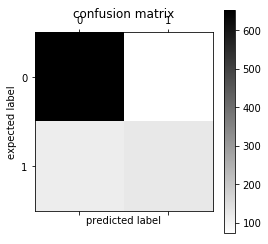

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(test_labels,result1), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [55]:
print (classification_report(test_labels,result1))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       725
         1.0       0.63      0.53      0.57       240

   micro avg       0.81      0.81      0.81       965
   macro avg       0.74      0.71      0.72       965
weighted avg       0.80      0.81      0.80       965



In [56]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
#Train the model using the training sets
knn.fit(train_matrix,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
result2 = knn.predict(test_matrix)

In [59]:
print (confusion_matrix(test_labels,result2))
print (accuracy_score(test_labels,result2))

[[544 181]
 [ 83 157]]
0.7264248704663212


In [60]:
knn = KNeighborsClassifier(n_neighbors=7)
#Train the model using the training sets
knn.fit(train_matrix,train_labels)
result2 = knn.predict(test_matrix)
print (confusion_matrix(test_labels,result2))
print (accuracy_score(test_labels,result2))

[[550 175]
 [ 79 161]]
0.7367875647668394
